In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("/kaggle/input/breast-disease/BreastCancer.csv")

In [3]:
data.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [4]:
data.shape

(699, 12)

In [5]:
data.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.shape

(683, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       683 non-null    int64  
 1   Id               683 non-null    int64  
 2   Cl.thickness     683 non-null    int64  
 3   Cell.size        683 non-null    int64  
 4   Cell.shape       683 non-null    int64  
 5   Marg.adhesion    683 non-null    int64  
 6   Epith.c.size     683 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      683 non-null    int64  
 9   Normal.nucleoli  683 non-null    int64  
 10  Mitoses          683 non-null    int64  
 11  Class            683 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 69.4+ KB


In [9]:
X = data.iloc[:, 2:10]

In [10]:
X.shape

(683, 8)

In [11]:
y = data.iloc[:, 11]

In [12]:
y.shape

(683,)

In [13]:
y.dtype

dtype('O')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_train

array([[-1.2001128 , -0.04874055, -0.08496608, ..., -0.69042219,
         1.42172642, -0.28715754],
       [-0.14191919, -0.70545527, -0.74409692, ..., -0.69042219,
        -0.59356685, -0.61315457],
       [-1.2001128 , -0.70545527, -0.08496608, ..., -0.69042219,
        -0.59356685, -0.61315457],
       ...,
       [-1.2001128 , -0.70545527, -0.4145315 , ..., -0.69042219,
        -0.19050819, -0.61315457],
       [-0.49465039,  0.27961681,  0.57416475, ..., -0.14699996,
         0.21255046,  1.01683058],
       [-1.2001128 , -0.70545527, -0.74409692, ..., -0.69042219,
        -0.59356685, -0.61315457]])

In [19]:
X_train.shape

(512, 8)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.56354321,  2.24976098,  2.22199183, ...,  1.75497785,
         1.82478508,  2.3208187 ],
       [-0.49465039, -0.70545527, -0.74409692, ..., -0.69042219,
        -0.19050819, -0.61315457],
       [-1.2001128 , -0.70545527, -0.74409692, ..., -0.69042219,
        -0.59356685, -0.61315457],
       ...,
       [ 0.21081201, -0.70545527, -0.74409692, ..., -0.69042219,
        -0.59356685, -0.28715754],
       [-0.14191919, -0.70545527, -0.74409692, ..., -0.69042219,
        -0.19050819, -0.61315457],
       [-1.2001128 , -0.70545527, -0.4145315 , ..., -0.69042219,
        -0.59356685, -0.61315457]])

In [22]:
X_test.shape

(171, 8)

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [24]:
mlp.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [25]:
predictions = mlp.predict(X_test)

In [26]:
predictions

array(['malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malign

In [27]:
print(confusion_matrix(y_test, predictions))

[[106   4]
 [  2  59]]


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      benign       0.98      0.96      0.97       110
   malignant       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [29]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [30]:
y_pred_prob = mlp.predict_proba(X_test)[:, 1]

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='malignant')

In [32]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)

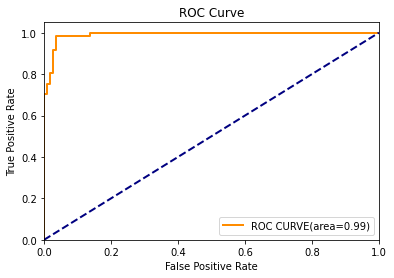

In [33]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC CURVE(area=%0.2f)' % auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()